In [22]:
import joblib
'''
Pre-process raw data
'''
from sklearn.metrics import accuracy_score, classification_report
from RandomForestDev.TestData import generateTestData
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix

def get_matrix(y_test,y_pred):
    #Confusion Matrix

    rf_matrix = confusion_matrix(y_test, y_pred)

    true_negatives = rf_matrix[0][0]
    false_negatives = rf_matrix[1][0]
    true_positives = rf_matrix[1][1]
    false_positives = rf_matrix[0][1]

    accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
    percision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)


    print("====================")
    print('Accuracy: {}'.format(float(accuracy)))
    print('Percision: {}'.format(float(percision)))
    print('Recall: {}'.format(float(recall)))
    print('Specificity: {}'.format(float(specificity)))
    print("====================")


def model_load(path):
    rfc = joblib.load(path)
    return rfc

def model_save(model,path):
    joblib.dump(model,path)

In [16]:
'''
todo: train the model with partial training.

training dataset:
sh, TSLA, ETH

test dataset:
BTC BNB
'''

train_data_sh=generateTestData("data/price_data_sh.csv")
train_data_tsla=generateTestData("data/price_data_tsla.csv")
train_data_eth=generateTestData("data/price_data_eth.csv")

test_data_btc=generateTestData("data/price_data_btc.csv")
test_data_bnb=generateTestData("data/price_data_bnb.csv")

test_data_bnb.head(50)

c:\users\79285\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
c:\users\79285\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\79285\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,rsi,obv_ratio,william,kdj,ema3v8,ema8v21,atr_ratio,prediction
2020-03-01 08:00:00,24.477686,-24.457908,-82.414198,17.585802,-0.041414,-0.062771,-0.193895,0
2020-03-02 08:00:00,39.587721,-34.858903,-67.747140,32.252860,-0.020893,-0.056712,-0.277253,0
2020-03-03 08:00:00,37.715750,17.921754,-70.348229,29.651771,-0.013615,-0.052557,-0.345050,0
2020-03-04 08:00:00,41.902922,4.199069,-59.405763,40.594237,-0.005280,-0.046831,-0.451555,0
2020-03-05 08:00:00,52.160183,-0.195292,-45.355289,54.644711,0.009400,-0.037054,-0.391144,0
2020-03-06 08:00:00,58.836641,-2.872473,-34.168606,65.831394,0.022357,-0.025618,-0.376851,0
2020-03-07 08:00:00,45.752099,-0.738167,-54.036155,45.963845,0.009847,-0.023752,-0.154163,0
2020-03-08 08:00:00,25.710466,2.049331,-97.231097,2.768903,-0.043777,-0.042864,0.246882,0
2020-03-09 08:00:00,24.575868,4.067488,-85.219932,14.780068,-0.066540,-0.058090,0.406326,0
2020-03-10 08:00:00,27.695718,1.380328,-80.104201,19.895799,-0.065147,-0.066459,0.318966,0


In [17]:

'''
rsi	obv_ratio	william	kdj	ema3v8	ema8v21	atr_ratio	prediction

'''
#x_cols = data[['rsi','obv_ratio','william','ema3v8','ema8v21','atr_ratio']]

random_forest_classifier=RandomForestClassifier(n_estimators=80, oob_score = True, criterion='gini',random_state=50,warm_start=True)

for train_data in (train_data_eth,train_data_sh,train_data_tsla):

    x_cols = train_data[['rsi','obv_ratio','william','ema3v8','ema8v21','atr_ratio']]
    y_cols = train_data['prediction']

    x_train, x_test, y_train, y_test = train_test_split(x_cols,y_cols,random_state=0,shuffle=False)

    # fit data to the model
    random_forest_classifier.fit(x_train,y_train)

    # make predictions
    y_pred=random_forest_classifier.predict(x_test)

    get_matrix(y_test,y_pred)


Accuracy: 0.8113590263691683
Percision: 0.5142857142857142
Recall: 0.5625
Specificity: 0.871536523929471
Accuracy: 0.7672955974842768
Percision: 0.45806451612903226
Recall: 0.5259259259259259
Specificity: 0.8323353293413174
Accuracy: 0.7496823379923762
Percision: 0.5654205607476636
Recall: 0.5377777777777778
Specificity: 0.8345195729537367


c:\users\79285\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:453: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
c:\users\79285\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:453: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


In [21]:
col_list=['rsi','obv_ratio','william','ema3v8','ema8v21','atr_ratio']

'''test with btc'''
y_pred_btc=random_forest_classifier.predict(test_data_btc[col_list])
y_test_btc=test_data_btc['prediction']
get_matrix(y_test_btc,y_pred_btc)


'''test with bnb'''
y_pred_bnb=random_forest_classifier.predict(test_data_bnb[col_list])
y_test_bnb=test_data_bnb['prediction']
get_matrix(y_test_bnb,y_pred_bnb)


'''
Result:

BTC:
====================
Accuracy: 0.7678424938474159
Percision: 0.5300751879699248
Recall: 0.47157190635451507
Specificity: 0.8641304347826086
====================

BNB:
====================
Accuracy: 0.7603383458646616
Percision: 0.5274261603375527
Recall: 0.4664179104477612
Specificity: 0.8592964824120602
====================
'''


Accuracy: 0.7678424938474159
Percision: 0.5300751879699248
Recall: 0.47157190635451507
Specificity: 0.8641304347826086
Accuracy: 0.7603383458646616
Percision: 0.5274261603375527
Recall: 0.4664179104477612
Specificity: 0.8592964824120602


In [23]:
'''
Model Save and Load
'''
model_save(random_forest_classifier,"rfc_finance_market.joblib")
rfc=model_load("rfc_finance_market.joblib")
y_pred_bnb=rfc.predict(test_data_bnb[col_list])
y_test_bnb=test_data_bnb['prediction']
get_matrix(y_test_bnb,y_pred_bnb)

Accuracy: 0.7603383458646616
Percision: 0.5274261603375527
Recall: 0.4664179104477612
Specificity: 0.8592964824120602


ema8v21      0.192252
rsi          0.191671
ema3v8       0.181102
william      0.159072
obv_ratio    0.138339
atr_ratio    0.137563
dtype: float64


Text(0.5, 1.0, 'Random Forest: Feature Importance Graph')

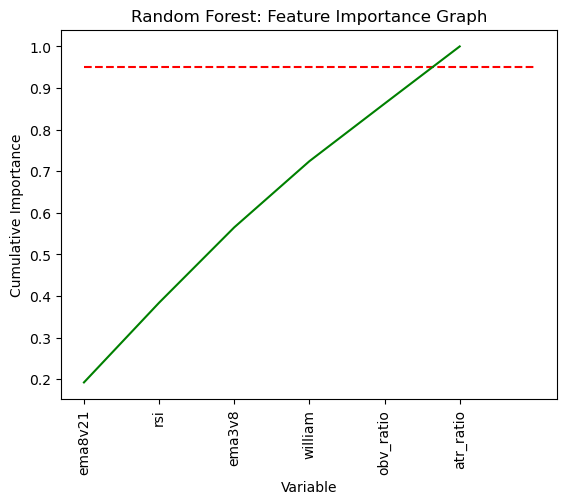

In [5]:
'''Model Evaluation'''


'''
Feature Importance Graphing
'''
import numpy as np
import matplotlib.pyplot as plt

feature_imp = pd.Series(random_forest_classifier.feature_importances_, index=x_cols.columns).sort_values(ascending=False)
print(feature_imp)

# store the values in a list to plot
x_values = list(range(len(random_forest_classifier.feature_importances_)))

# Cumulative importances
cumulative_importances = np.cumsum(feature_imp.values)

# make a line graph
plt.plot(x_values,cumulative_importances,'g-')

# Draw line at 95% of importance retained
plt.hlines(y=0.95,xmin=0,xmax=len(feature_imp),colors='r',linestyles='dashed')

# Format x ticks and labels
plt.xticks(x_values,feature_imp.index,rotation='vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title("Random Forest: Feature Importance Graph")


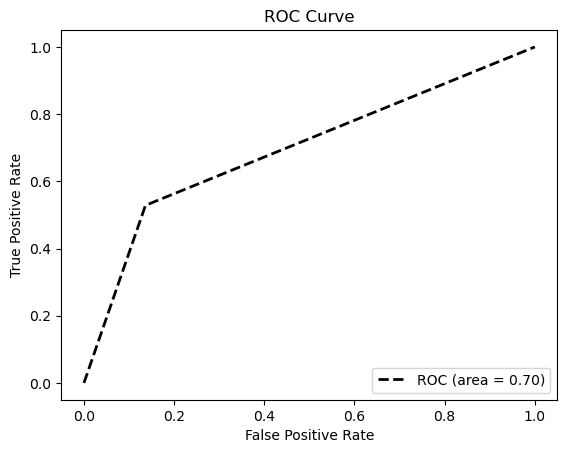

In [8]:
'''
Create an ROC curve plot
'''
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr,tpr,threshold=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [9]:
print('Random Forest Out-Of-Bag Error Score: {}'.format(random_forest_classifier.oob_score_))

Random Forest Out-Of-Bag Error Score: 0.8047244094488188


In [11]:
'''
以下是发现最优参数的办法
Feature importance graphing
'''
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# Number of trees is not a parameter that should be tuned, but just set large enough usually. There is no risk of overfitting in random forest with growing number of # trees, as they are trained independently from each other.
n_estimators = list(range(200, 2000, 200))

# Number of features to consider at every split
max_features = ['auto', 'sqrt', None, 'log2']

# Maximum number of levels in tree
# Max depth is a parameter that most of the times should be set as high as possible, but possibly better performance can be achieved by setting it lower.
max_depth = list(range(10, 110, 10))
max_depth.append(None)

# Minimum number of samples required to split a node
# Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree. Too high values can also lead to # under-fitting hence depending on the level of underfitting or overfitting, you can tune the values for min_samples_split.
min_samples_split = [2, 5, 10, 20, 30, 40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 7, 12, 14, 16 ,20]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# New Random Forest Classifier to house optimal parameters
rf = RandomForestClassifier()

# Specfiy the details of our Randomized Search
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(x_train, y_train)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 'min_samples_split': [2, 5, 10, 20, 30, 40], 'min_samples_leaf': [1, 2, 7, 12, 14, 16, 20], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt', None,
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 7, 12, 14,
                                                             16, 20],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800]},
                   random_state=42, verbose=2)

In [12]:
print("Best estimator: {}".format(rf_random.best_estimator_))
print("Best score: {}".format(rf_random.best_score_))
print("Best params: {}".format(rf_random.best_params_))
print("Best index: {}".format(rf_random.best_index_))

'''
测试结果：
Best estimator: RandomForestClassifier(max_depth=90, min_samples_leaf=12, min_samples_split=20,
                       n_estimators=800)
Best score: 0.7627296587926509
Best params: {'n_estimators': 800, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
Best index: 76
'''





Best estimator: RandomForestClassifier(max_depth=90, min_samples_leaf=12, min_samples_split=20,
                       n_estimators=800)
Best score: 0.7627296587926509
Best params: {'n_estimators': 800, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'max_depth': 90, 'bootstrap': True}
Best index: 76
